In [1]:
import pandas as pd 
import numpy as np

In [3]:
cnc_df = pd.read_excel('CNC Learntube project 3.xlsx')

In [4]:
cnc_df.head()

,Machine_ID,Date,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (Â°C),Operation_Hours,Machine_Status,Predicted_Failure
0,CNC006,2024-09-02,4300,2.3,79,10,Running,No
1,CNC007,2024-09-02,3700,2.0,84,9,Running,Yes
2,CNC008,2024-09-02,4400,2.4,82,8,Running,No
3,CNC009,2024-09-02,4000,3.0,88,12,Running,Yes
4,CNC010,2024-09-02,4700,3.2,91,11,Running,Yes


In [7]:
cnc_df.shape

(35, 8)

In [8]:
cnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Machine_ID              35 non-null     object        
 1   Date                    35 non-null     datetime64[ns]
 2   Spindle_Speed_RPM       35 non-null     int64         
 3   Vibration_Level (mm/s)  35 non-null     float64       
 4   Temperature (Â°C)       35 non-null     int64         
 5   Operation_Hours         35 non-null     int64         
 6   Machine_Status          35 non-null     object        
 7   Predicted_Failure       35 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 2.3+ KB


In [11]:
cnc_df.isnull().sum

<bound method DataFrame.sum of     Machine_ID   Date  Spindle_Speed_RPM  Vibration_Level (mm/s)  \
0        False  False              False                   False   
1        False  False              False                   False   
2        False  False              False                   False   
3        False  False              False                   False   
4        False  False              False                   False   
5        False  False              False                   False   
6        False  False              False                   False   
7        False  False              False                   False   
8        False  False              False                   False   
9        False  False              False                   False   
10       False  False              False                   False   
11       False  False              False                   False   
12       False  False              False                   False   
13       False  F

In [12]:
cnc_fail = pd.read_csv('Machine failures.csv')

In [13]:
cnc_fail.head()

,Machine_ID,Failure_Date,Failure_Type,Downtime_Hours,Repair_Time (hours),Issue_Resolved_By,Comments
0,CNC006,18-08-2024,Motor Failure,6,4,Technician F,Replaced motor
1,CNC007,22-08-2024,Overheating,4,3,Technician G,Adjusted cooling system
2,CNC008,12-08-2024,Vibration Issue,5,2,Technician H,Tightened bearings
3,CNC009,30-07-2024,Electrical Failure,7,5,Technician I,Rewired machine
4,CNC010,04-08-2024,Spindle Breakdown,8,6,Technician J,Replaced spindle motor


In [14]:
cnc_sched =  pd.read_csv('machine_schedule.csv')

In [15]:
cnc_use =  pd.read_csv('Machine_usage.csv')

In [16]:
cnc_sched.head()

,Machine_ID,Last_Maintenance_Date,Next_Scheduled_Maintenance,Maintenance_Type,Technician_Name,Maintenance_Comments
0,CNC006,02-08-2024,16-09-2024,Routine Inspection,Technician F,"Routine oiling, checked bearings"
1,CNC007,03-08-2024,17-09-2024,Vibration Control,Technician G,Adjusted vibration damping
2,CNC008,12-08-2024,22-09-2024,Temperature Check,Technician H,Inspected cooling system
3,CNC009,06-08-2024,19-09-2024,Electrical System,Technician I,Checked electrical components
4,CNC010,14-08-2024,23-09-2024,Spindle Inspection,Technician J,Checked spindle alignment


In [17]:
cnc_use.head()

,Machine_ID,Date,Parts_Produced,Production_Quality,Rejection_Rate (%),Idle_Time (hours),Operator_Name
0,CNC006,02-09-2024,152,High,1.2,0.3,Operator F
1,CNC007,02-09-2024,138,Medium,2.9,1.1,Operator G
2,CNC008,02-09-2024,165,High,1.7,0.4,Operator H
3,CNC009,02-09-2024,142,Low,4.2,1.3,Operator I
4,CNC010,02-09-2024,158,High,1.6,0.5,Operator J


In [18]:
cnc_df.head()

,Machine_ID,Date,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (Â°C),Operation_Hours,Machine_Status,Predicted_Failure
0,CNC006,2024-09-02,4300,2.3,79,10,Running,No
1,CNC007,2024-09-02,3700,2.0,84,9,Running,Yes
2,CNC008,2024-09-02,4400,2.4,82,8,Running,No
3,CNC009,2024-09-02,4000,3.0,88,12,Running,Yes
4,CNC010,2024-09-02,4700,3.2,91,11,Running,Yes


In [20]:
new_cnc = cnc_df[['Machine_ID', 'Spindle_Speed_RPM' , 'Vibration_Level (mm/s)', 'Temperature (Â°C)', 'Operation_Hours', 'Machine_Status', 'Predicted_Failure' ]]

In [22]:
new_cnc.head()

,Machine_ID,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (Â°C),Operation_Hours,Machine_Status,Predicted_Failure
0,CNC006,4300,2.3,79,10,Running,No
1,CNC007,3700,2.0,84,9,Running,Yes
2,CNC008,4400,2.4,82,8,Running,No
3,CNC009,4000,3.0,88,12,Running,Yes
4,CNC010,4700,3.2,91,11,Running,Yes


In [23]:
new_fail = cnc_fail[['Machine_ID' , 'Failure_Type', 'Downtime_Hours', 'Repair_Time (hours)']]

In [24]:
new_fail.head()

,Machine_ID,Failure_Type,Downtime_Hours,Repair_Time (hours)
0,CNC006,Motor Failure,6,4
1,CNC007,Overheating,4,3
2,CNC008,Vibration Issue,5,2
3,CNC009,Electrical Failure,7,5
4,CNC010,Spindle Breakdown,8,6


In [27]:
new_sched = cnc_sched[[	'Machine_ID', 'Maintenance_Type']]

In [28]:
new_sched.head()

,Machine_ID,Maintenance_Type
0,CNC006,Routine Inspection
1,CNC007,Vibration Control
2,CNC008,Temperature Check
3,CNC009,Electrical System
4,CNC010,Spindle Inspection


In [29]:
new_use = cnc_use[['Machine_ID', 'Parts_Produced', 'Production_Quality', 'Rejection_Rate (%)']]

In [31]:
new_use.head()

,Machine_ID,Parts_Produced,Production_Quality,Rejection_Rate (%)
0,CNC006,152,High,1.2
1,CNC007,138,Medium,2.9
2,CNC008,165,High,1.7
3,CNC009,142,Low,4.2
4,CNC010,158,High,1.6


In [32]:
new_df = new_cnc.merge('new_use', 'new_sched', 'new_fail', how = 'right')

TypeError: DataFrame.merge() got multiple values for argument 'how'

In [33]:
merged_df = new_cnc.merge(new_fail, on='Machine_ID', how='left')  # Merge df1 with df2
merged_df = merged_df.merge(new_sched, on='Machine_ID', how='left')  # Merge with df3
merged_df = merged_df.merge(new_use, on='Machine_ID', how='left')

In [35]:
merged_df.head()

,Machine_ID,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (Â°C),Operation_Hours,Machine_Status,Predicted_Failure,Failure_Type,Downtime_Hours,Repair_Time (hours),Maintenance_Type,Parts_Produced,Production_Quality,Rejection_Rate (%)
0,CNC006,4300,2.3,79,10,Running,No,Motor Failure,6,4,Routine Inspection,152,High,1.2
1,CNC007,3700,2.0,84,9,Running,Yes,Overheating,4,3,Vibration Control,138,Medium,2.9
2,CNC008,4400,2.4,82,8,Running,No,Vibration Issue,5,2,Temperature Check,165,High,1.7
3,CNC009,4000,3.0,88,12,Running,Yes,Electrical Failure,7,5,Electrical System,142,Low,4.2
4,CNC010,4700,3.2,91,11,Running,Yes,Spindle Breakdown,8,6,Spindle Inspection,158,High,1.6


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Machine_ID', 'Machine_Status', 'Predicted_Failure', 'Failure_Type', 'Maintenance_Type', 'Production_Quality']

# Apply label encoding to each column
for col in categorical_columns:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])

print(merged_df)

    Machine_ID  Spindle_Speed_RPM  Vibration_Level (mm/s)  Temperature (Â°C)  \
0            0               4300                     2.3                 79   
1            1               3700                     2.0                 84   
2            2               4400                     2.4                 82   
3            3               4000                     3.0                 88   
4            4               4700                     3.2                 91   
5            5               4500                     2.2                 80   
6            6               3650                     1.9                 83   
7            7               4250                     2.6                 84   
8            8               4050                     2.8                 89   
9            9               4550                     3.3                 93   
10          10               4450                     2.1                 77   
11          11               3750       

In [38]:
merged_df.head()

,Machine_ID,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (Â°C),Operation_Hours,Machine_Status,Predicted_Failure,Failure_Type,Downtime_Hours,Repair_Time (hours),Maintenance_Type,Parts_Produced,Production_Quality,Rejection_Rate (%)
0,0,4300,2.3,79,10,0,0,1,6,4,1,152,0,1.2
1,1,3700,2.0,84,9,0,1,2,4,3,4,138,2,2.9
2,2,4400,2.4,82,8,0,0,4,5,2,3,165,0,1.7
3,3,4000,3.0,88,12,0,1,0,7,5,0,142,1,4.2
4,4,4700,3.2,91,11,0,1,3,8,6,2,158,0,1.6


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = merged_df.drop('Predicted_Failure', axis=1)  # Features (all columns except the target)
y = merged_df['Predicted_Failure']  # Target column (Predicted_Failure)

In [41]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [45]:
# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
[[1 0]
 [0 6]]


In [47]:
y_pred

array([1, 1, 1, 1, 0, 1, 1])

In [48]:
import pickle
from sklearn.ensemble import RandomForestClassifier

In [49]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)  # 'rf_model' is the trained mode

In [50]:
# Load the saved model from the file
with open('rf_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Now, you can use 'loaded_rf_model' as if it was the original model
y_pred_loaded = loaded_rf_model.predict(X_test)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [56]:
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [57]:
print(f"Best Model Accuracy: {accuracy_best:.4f}")

Best Model Accuracy: 1.0000


In [58]:
print("Predictions on test data:", y_pred[:10])

Predictions on test data: [1 1 1 1 0 1 1]


In [59]:
# Compare the predicted and true labels
comparison = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

print(comparison.head(10))  # Show the first 10 comparisons


    True Label  Predicted Label
26           1                1
13           1                1
24           1                1
21           1                1
15           0                0
29           1                1
19           1                1


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)

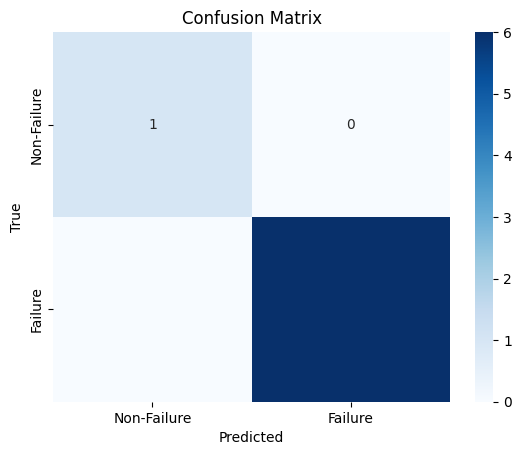

In [68]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Failure', 'Failure'], yticklabels=['Non-Failure', 'Failure'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Now we will make SVM model for the same.


In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
svm_model = SVC(kernel='linear', random_state=42)  
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [78]:
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM Model: {accuracy_svm:.4f}")

Accuracy of SVM Model: 1.0000


In [79]:
# Classification Report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [80]:
# Confusion Matrix
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

Confusion Matrix for SVM:
[[1 0]
 [0 6]]


In [81]:
#Hypertunning the model..

svm_model_tuned = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model_tuned.fit(X_train, y_train)
y_pred_svm_tuned = svm_model_tuned.predict(X_test)

In [82]:
#accuracy 
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
print(f"Accuracy of Tuned SVM Model: {accuracy_svm_tuned:.4f}")

Accuracy of Tuned SVM Model: 0.8571


In [83]:
# Classification report
print("Classification Report for Tuned SVM:")
print(classification_report(y_test, y_pred_svm_tuned))

Classification Report for Tuned SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



C:\Users\Samson Noronha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samson Noronha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samson Noronha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
# Confusion Matrix
print("Confusion Matrix for Tuned SVM:")
print(confusion_matrix(y_test, y_pred_svm_tuned))

Confusion Matrix for Tuned SVM:
[[0 1]
 [0 6]]
